In [1]:
import pandas as pd 
import numpy as np 
import random as r 
from chromosome import *
from genes import *

### Growth Process
1. Generate Node gene
2. Generate Edge genes for new node

In [2]:
def dummy_node_gen(phenotype_network, node_id):
    """
    Dummy grow function to simulate the growth of a node. returns a new node gene
    """
    parent_node = next((node for node in phenotype_network.nodes if node.id == node_id), None) #use a dict for faster lookup

    new_id = max([node.id for node in phenotype_network.nodes]) +1 
    new_bias = parent_node.bias + r.uniform(-1,1)

    hidden_layers = [node for node in phenotype_network.nodes if isinstance(node.layer, int)]
    max_layer = max([node.layer for node in hidden_layers])
    
    new_layer = parent_node.layer + r.randint(-1, 1) # Randomly select a layer gene
    if new_layer < 1:
        new_layer = 1 
    # elif new_layer > max_layer:
    #     new_layer = max_layer
    
    return NodeGene(node_id=new_id, bias=new_bias, layer=new_layer)

def dummy_edge_gen(phenotype_network, node_id):
    """
    Dummy grow function to simulate the growth of an edge. returns a new edge gene
    """
    div_node = next((node for node in phenotype_network.nodes if node.id == node_id), None) #use a dict for faster lookup

    new_id = max([edge.id for edge in phenotype_network.edges]) +1 
    new_weight = r.uniform(-1,1)

    if r.random() < 0.5:
        source_node= div_node.id
        target_node = r.choice([node.id for node in phenotype_network.nodes if node.id != div_node.id]) #if node.layer > div_node.layer
    else:
        source_node = r.choice([node.id for node in phenotype_network.nodes if node.id != div_node.id]) #if node.layer < div_node.layer
        target_node = div_node.id
    
    return EdgeGene(edge_id=new_id, weight=new_weight, source=source_node, target=target_node)

def dummy_grow(phenotype_network, node_id, step=True):
    """
    Dummy grow function to simulate the growth of a node and an edge. returns a new node gene and a new edge gene
    """
    new_node = dummy_node_gen(phenotype_network, node_id)
    phenotype_network.nodes.append(new_node)
    
    if step: phenotype_network.show()
        
    new_edges = []
    for i in range(3): 
        new_edge = dummy_edge_gen(phenotype_network, new_node.id)
        new_edges.append(new_edge)
    phenotype_network.edges.extend(new_edges)


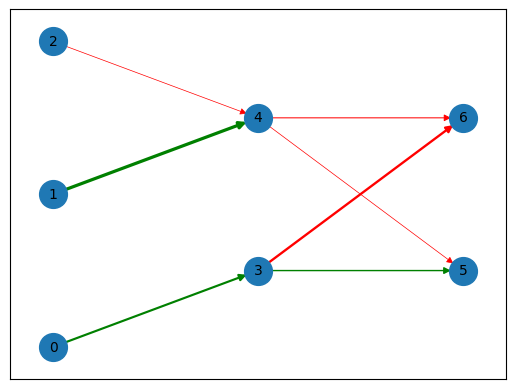

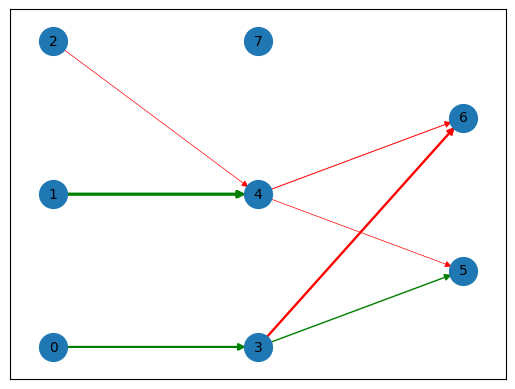

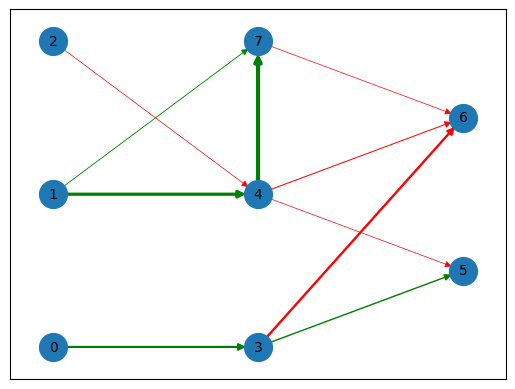

In [3]:
P = Chromosome(0, inputs=3, outputs=2, hidden=2)
P.show()
dummy_grow(P, 4) 
P.show()